# Problem Set 2
## Due Tuesday 18 October 2022

Answer each of the following questions. **Read each question carefully to see what you need to do.** Each question has multiple parts. Don't miss any of the questions.

<font color = 'red'>
29/30
<font>

In [21]:
# importing neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1

We want to compute the derivative of $f(x) = \log x$ at $x=3$. In doing so, you will learn about a powerful technique called Richardson extrapolation.

a) first, find the exact expression for $f'(x)$ using calculus by hand. Evaluate that function at $x = 3$, and store that value in a variable `dfdx_exact`.

In [22]:
def dfdx_log(x):
    if x<=0:
        raise ValueError("log(x) is only defined for x>0: x must be greater than 0.")
    return 1/x

dfdx_exact = dfdx_log(3)
print("dfdx_exact =",dfdx_exact)

dfdx_exact = 0.3333333333333333


b) Now compute the second order central difference approximation at $x = 3$ using a stepsize of $h_1=0.4$.  Save that in `dfdx_h1`. Calculate the relative error $\epsilon_{h_1}$ with the exact solution.


$$f'_{cd}(x) \equiv \frac{f(x+h/2) - f(x-h/2)}{h}$$

In [23]:
def cd(f,x,h):
    return (f(x+h/2)-f(x-h/2))/h

In [24]:
dfdx_h1 = cd(np.log, 3, .4)
err_h1 = abs(dfdx_h1-dfdx_exact)/dfdx_exact

print("dfdx_h1= ", dfdx_h1, '\n')
print("The relative error in the calculations of derivitive of log(x) at x=3 using the \n" + \
      "central difference approximation and a step size of 0.4 is about", round(err_h1, 5))

dfdx_h1=  0.33382848156130684 

The relative error in the calculations of derivitive of log(x) at x=3 using the 
central difference approximation and a step size of 0.4 is about 0.00149


c) Do the same thing again, but use $h_2 = h_1/2 = 0.2$. Save this as `dfdx_h2`. Calculate the relative error $\epsilon_{h_2}$ with the exact solution.

In [25]:
dfdx_h2 = cd(np.log, 3, .2)
err_h2 = abs(dfdx_h2-dfdx_exact)/dfdx_exact

print("dfdx_h2= ", dfdx_h2, '\n')
print("The relative error in the calculations of derivitive of log(x) at x=3 using the \n" + \
      "central difference approximation and a step size of 0.2 is about", round(err_h2, 5))

dfdx_h2=  0.33345687249336176 

The relative error in the calculations of derivitive of log(x) at x=3 using the 
central difference approximation and a step size of 0.2 is about 0.00037


Remember that if we continue to decrease $h$ arbitrarily, we will run into round off errors. We would like to further improve accuracy *without* decreasing the stepsize. This leads us to the extremely powerful technique of Richardson Extrapolation. Here, we compute $f'(x)$ twice using the same method with two different stepsizes and combine them together to get a *higher order* solution that we started with:

$$f'_r(x) = f'_{h_2}(x) + \frac{1}{2^2 - 1} ( f'_{h_2}(x) - f'_{h_1}(x))$$

Compute this $f'_r(x)$ and compare its value at $x = 3$ to the analytic value. How does it compare? Make a table showing the absolute (e.g. $f'(3) - f'_r(3)$) and relative error ($(f'(3) - f'_r(3))/f'_r(3)$) for all three approximations.

In [26]:
def rich_extra(f, x, h):
    """
    Here we assume h is h_1 and h_2 is (h_1)/2.

    We also use the Central Difference Approximation to get the derivitives using these different
    step sizes
    """

    h_1 = h
    h_2 = h_1 / 2

    approx = cd(f,x,h_2) +1/(2**2-1)*( cd(f,x,h_2)-cd(f,x,h_1) )
    return approx

dfdx_r = rich_extra(np.log,3,.4)
err_r = abs(dfdx_r - dfdx_exact) / dfdx_exact

print("dfdx_r=", dfdx_r)
print("The relative error in the calculations of derivitive of log(x) at x=3 using the \n" + \
      "Richardson Extrapolation approximation and an original step size of 0.4 is about", round(err_r, 10))

dfdx_r= 0.3333330028040467
The relative error in the calculations of derivitive of log(x) at x=3 using the 
Richardson Extrapolation approximation and an original step size of 0.4 is about 9.916e-07


In [27]:
data = [[dfdx_h1,dfdx_h2,dfdx_r],[err_h1,err_h2,err_r]]
df = pd.DataFrame(data, index = ["Value of Derivitive", "Relative Error"], \
                  columns = ["CD Approximation using h=0.4", "CD Approximation using h=0.2", \
                  r"RE Approximation using h_1=0.4 and h_1=0.2"])
pd.options.display.float_format = "{:,.16f}".format
df

,CD Approximation using h=0.4,CD Approximation using h=0.2,RE Approximation using h_1=0.4 and h_1=0.2
Value of Derivitive,0.3338284815613068,0.3334568724933618,0.3333330028040467
Relative Error,0.0014854446839206,0.0003706174800853,0.0000009915878598


<font color = 'red'>
9/10

You were asked for relative and **Absolute** Error calculations. 
<font>



---



## Question 2

Debye's theory of solids gives the heat capacity of a solid at temperature $T$ to be 

$$C_V = 9 V \rho k_B \left(\frac{T}{\theta_D} \right)^3 \int_0^{\theta_D/T} \frac{x^4 e^x}{(e^x - 1)^2} dx,$$

where $V$ is the volume of the solid, $\rho$ is the number density of atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the *Debye temperature*, a property of solids dependent on their density and sound speed.

a) write a function `cv(T)` that calculates $C_V$ for a given temperature `T` for the specific case of a $1000\ \mathrm{cm}^3$ block of solid aluminum, with number density $\rho = 6.022 \times 10^{28}\ \mathrm{m^{-3}}$ and a Debye temperature $\theta_D = 428\ \mathrm{K}$. Use Gaussian quadruture to compute the integral with $N=50$ points


In [28]:
def gauss(f,a,b,N):
    y,wprime = np.polynomial.legendre.leggauss(N)
    x = 0.5*(y + 1)*(b - a) + a
    w = wprime* 0.5*(b-a)
    return (f(x)*w).sum()

In [29]:
def cv(T):
    V = 0.001 # converting to m
    rho = 6.022 * 10**28
    theta_D = 428
    k_B = 1.380649 * 10**(-23) #SI units
    integrand = lambda x: x**4 * np.exp(x)/(np.exp(x)-1)**2
    if type(T) == int:
        integral = gauss(integrand,0,theta_D/T,50)
    else: #assume its a numpy array
        integral = np.array([gauss(integrand,0,theta_D/T_ele,50) for T_ele in T])
    return 9*V*rho*k_B*(T/theta_D)**3 * integral

b) Use that function to make a plot of the heat capacity as a function of temperature from $T=5\ \mathrm{K}$ K to $T=500\ \mathrm{K}$.


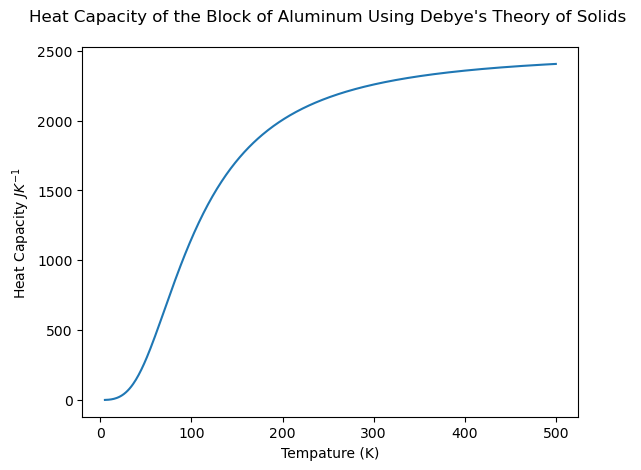

In [30]:
T_array = np.linspace(5,500,496)
cv_array = cv(T_array)

plt.plot(T_array, cv_array)
plt.xlabel("Tempature (K)")
plt.ylabel(r"Heat Capacity $JK^{-1}$")
plt.title("Heat Capacity of the Block of Aluminum Using Debye's Theory of Solids \n")
plt.show()

c) Could you have used the Simpson's rule to do this integral? Why or why not?

<font color = 'blue'>
No, we could not use Simpson's rule to do this integral as the integral had 50 bins and Simpson's rule requires that the number of bins be odd and greater than 3. 

</font>

<font color = 'red'>
10/10

Even if you use an odd number of bins Simposon wont work, why?
<font>



---



## Question 3
Make a plot of the semi-circle fucntion 

$$
f(x) \ = \ \sqrt{1-x^2}
$$

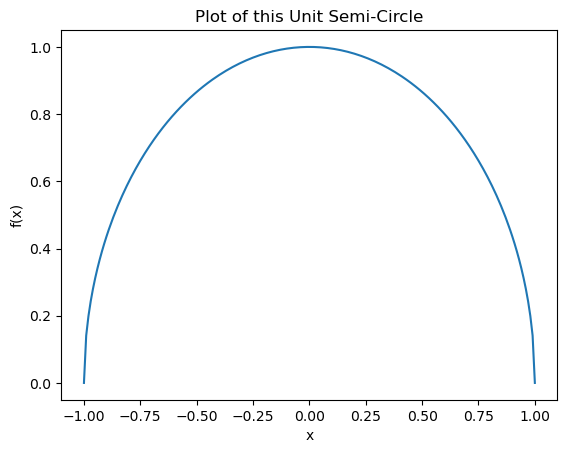

In [31]:
f_x_ = lambda x: np.sqrt(1-x**2) # only defined form x = -1 to x = 1(positive values)

x_array = np.linspace(-1,1,201) # this function is only defined from x=-1 to x=1
f_x_array = f_x_(x_array)

plt.plot(x_array, f_x_array)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of this Unit Semi-Circle")
plt.show()

Use your implementation of Simpson's rule to find $\pi$.

$$
\pi \ = \ 4 \int_{0}^{1} \sqrt{1-x^{2}}\, \mathrm{d} x
$$

In [32]:
def qsimp(f,a,b,N):
    """qsimp uses Simpson's rule to evaluate an approximation to the integral of f(x) on the interval [a, b] using N points.
    
    inputs
    ------
    f: function that can operate on numpy arrays
    a: float representing the lower limit of the integral
    b: float representing the upper limit of the integral
    N: int representing the number of samples
    
    """
    if N%2!=1 and N>=3:
        raise ValueError("Simpson's rule requires that N, the number of points be odd and at least 3.")
    h = (b-a)/(N-1) # first we define the width between each x_i
    x = a+np.arange(N)*h # np.arange(N) returns a np array; we can multiply it and add numbers to each element in it
    
    w = np.zeros(N) #initializing a weight array

    for i in range(len(x)):
        if i%2==1:
            w[i] = h *4/3 # i is even
        else:
            w[i] = h *2/3 # i is odd
    w[0] = w[-1] = h/3 # fixing end points
        
    data = f(x) # f is a function that we "pass" into the qtrap; here we have it evaluate at every point in x, 
                # storing the results in a new numpy array I called "data"
    
    # this is the actual integral: data*w is a new numpy array 
    # of the same length as data and w, which I call "integrand"
    integrand = data*w
    
    # numpy arrays can sum themeselves by calling their .sum() method:
    integral = integrand.sum()

    return integral

In [33]:
pi = 4*qsimp(f_x_,0,1,100001) # lets try and get it super accurate but not take forever

print("pi=",pi)

pi= 3.141592639067041


Make a log-log plot of the convergence as a function of the number of sample points. What is the convergence exponent? Why is it not -4? 

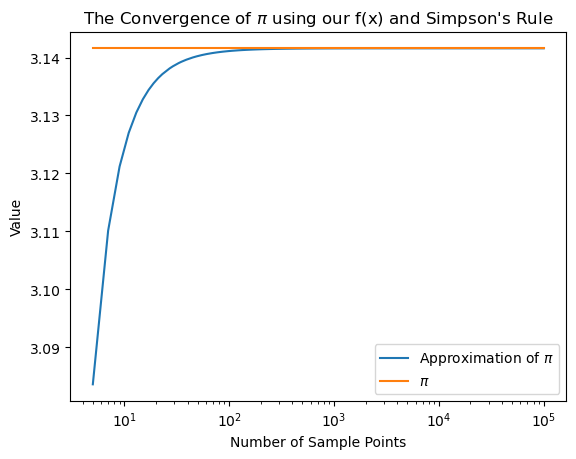

In [34]:
exp_arr = np.linspace(0,5,100)
N_ls = []
for exp in exp_arr:
    N = 3+(int(10**exp)) + (int(10**exp))%2 #encures N in odd and greater than 3 while also scaling logarithmically
    N_ls.append(N)
N_ls = np.unique(N_ls) #makes sure we don't repeat elements

pi_approx_arr = np.array([4*qsimp(f_x_,0,1,N) for N in N_ls])

plt.semilogx(N_ls, pi_approx_arr, label = r"Approximation of $\pi$")
plt.semilogx(N_ls, [np.pi for i in range(len(N_ls))], label = r"$\pi$")
plt.xlabel("Number of Sample Points")
plt.ylabel("Value")
plt.legend()
plt.title(r"The Convergence of $\pi$ using our f(x) and Simpson's Rule")
plt.show()

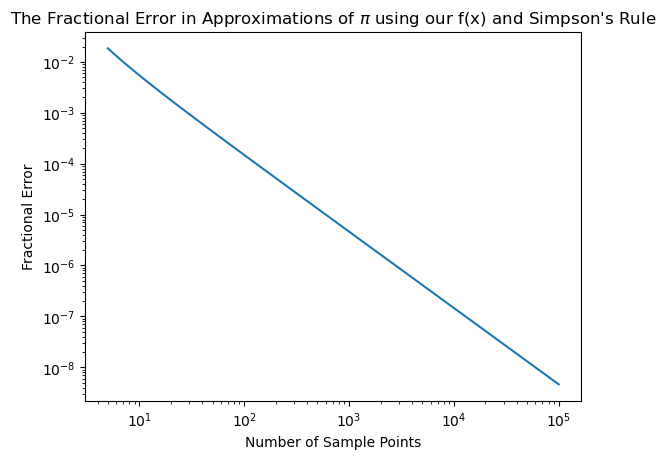

In [35]:
err_1 = abs(pi_approx_arr-np.pi)/np.pi


plt.loglog(N_ls, err_1)
plt.xlabel("Number of Sample Points")
plt.ylabel("Fractional Error")
plt.title(r"The Fractional Error in Approximations of $\pi$ using our f(x) and Simpson's Rule")
plt.show()

<font color = 'blue'>
The convergence exponent can be estimated by the slope of this curve. It is clear that the slope of this curve is not -4. I would estimate the convergence exponent is $1.6\pm0.5$. While someone might expect it to be -4 form the factor of 4 outside our integral: $\pi \ = \ 4 \int_{0}^{1} \sqrt{1-x^{2}}\, \mathrm{d} x$. However, this is not how we go about calculating the convergence exponent. 

</font>

There are other ways to do an integral and get the same result. Define the *sphere function*

$$
S(x,y) \ = \ \begin{cases} 1  & \mathrm{if} \quad x^{2} + y^{2} < 1 \\ \\
                         0  & \mathrm{if} \quad x^{2} + y^{2} \ge 1
           \end{cases}
$$

Therefore we can also compute $\pi$ with the two dimensional integral

$$
\pi \ = \ \int_{-1}^{1} \int_{-1}^{1}  S(x,y) \, \mathrm{d} x \, \mathrm{d} y \ = \ \mathrm{Area \ of \ a\  unit \ circle.}
$$


Make an integration routine that uses your Simpson's integrator to compute two-dimensional integrals.  Compute $\pi$ using this integrator.


Note: You can save yourself a factor of $4 = 2^{2}$ in cost by just integrating over the positive values. 

<font color = 'blue'>

Due to symmetry we can says a factor of 4 in this calculation by integrating:
$$
\pi \ = 4\ \int_{0}^{1} \int_{0}^{1}  S(x,y) \, \mathrm{d} x \, \mathrm{d} y \ = \ \mathrm{Area \ of \ a\  unit \ circle.}
$$


</font>

In [36]:
def S(x,y):
    if x**2 + y**2 < 1:
        return 1
    else:
        return 0

In [37]:
def qsimp_2_dim(f,x_i,x_f,y_i,y_f,N):
    """qsimp uses Simpson's rule to evaluate an approximation to the integral of f(x) on the interval [a, b] using N points.
    
    inputs
    ------
    f: function that can operate on numpy arrays
    x_0: float representing the lower limit of the integral with respect to the x variable 
    x_f: float representing the upper limit of the integral with respect to the x variable
    y_0: float representing the lower limit of the integral with respect to the y variable 
    y_f: float representing the upper limit of the integral with respect to the y variable
    N: int representing the number of samples which is the same for both variables
    
    """
    if N%2!=1 and N>=3:
        raise ValueError("Simpson's rule requires that N, the number of points be odd and at least 3.")
    h = (x_f-x_i)/(N-1) # first we define the width between each x_i
    x_array = x_i+np.arange(N)*h # np.arange(N) returns a np array; we can multiply it and add numbers to each element in it
    y_array = y_i+np.arange(N)*h 

    w_x = np.zeros(N) #initializing a weight array

    for i in range(len(x_array)):
        if i%2==1:
            w_x[i] = h *4/3 
        else:
            w_x[i] = h *2/3 
    w_x[0] = w_x[-1] = h/3 # fixing end points

    w_x_y = np.array([w_x for i in range(len(w_x))]) # and array of arrays where we must get each
                                                     # individual weight using 2 dimensions
    
    for i in range(1,len(y_array)-1):   # doesnt fix endpint weights
        if i%2==1:
            w_x_y[i] = w_x_y[i] * h *4/3 
        else:
            w_x_y[i] = w_x_y[i] * h *2/3 
    w_x_y[0] = w_x_y[-1] = w_x_y[0] *h/3 # fixing end points
        
    integral = 0

    # summing each value by their weights
    for i in range(len(x_array)):
        for j in range(len(y_array)):
            x = x_array[i]
            y = y_array[j]
            val = f(x,y)
            integral += w_x_y[i][j] * val

    return integral

In [38]:
pi_2= 4*qsimp_2_dim(S,0,1,0,1,3001)

print("pi_2=",pi_2)

pi_2= 3.1415844443064866


Make a log-log plot of the error in your calculation *as a function of the of the total number of calls to your function $S$*.

<font color = 'blue'>
It is clear that we call S, $N^2$ times.
</font>

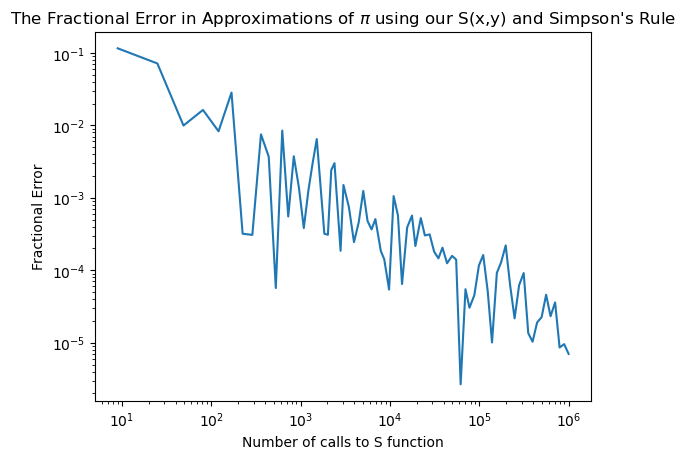

In [39]:
exp_arr = np.linspace(0,3,120)
N_ls = []
for exp in exp_arr:
    N = 1+(int(10**exp)) + (int(10**exp))%2 #encures N in odd and greater than 3 while also scaling logarithmically
    N_ls.append(N)
N_ls = np.unique(N_ls) #makes sure we don't repeat elements
S_calls = N_ls**2

pi_approx_arr = np.array([4*qsimp_2_dim(S,0,1,0,1,N) for N in N_ls])
err = abs(pi_approx_arr - np.pi)/np.pi

plt.loglog(S_calls, err)
plt.xlabel("Number of calls to S function")
plt.ylabel("Fractional Error")
plt.title(r"The Fractional Error in Approximations of $\pi$ using our S(x,y) and Simpson's Rule")
plt.show()

<font color = 'red'>
10/10
<font>